# **Titanic Data Analysis Project**

# **Objective of the project**

The goal of this project is to analyze the Titanic passenger dataset to:
Understand passenger demographics

Handle missing and duplicate 

Detect and remove outliers

Visualize key features

Prepare data for further modeling

# **📊 Dataset Details**
Source: Titanic dataset (Kaggle/open-source)

Rows: 891 passengers

Columns: 12 features

Key Columns: Age, Fare, Sex, Pclass, Embarked, Survived, etc.





# **Techniques Used while Loading data using pandas**

Data Exploration (head, tail, info, describe)

Data Cleaning (null handling, duplicates, outliers)

Data Preprocessing (renaming, filtering)

Data Visualization (matplotlib & seaborn)

Optional: Classification Modeling (Logistic Regression)

# **Tools Used**

Python

pandas

numpy

matplotlib

seaborn

jupyter notebook in vs code

# **Importing Required Libraries**

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Load The DataSet**

In [2]:
df=pd.read_csv("titanic.csv")

# **Initial Data Exploration**

In [3]:
df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley",female,38,1,0,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath",female,35,1,0,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S
5,6,1,"Moran, Mr. James",male,29,0,0,8.4583,Q
6,7,3,"McCarthy, Mr. Timothy J",male,54,0,0,51.8625,S
7,8,3,"Palsson, Miss. Torborg Danira",female,23,0,0,9.8375,S
8,9,2,"Johnson, Mrs. Oscar W",female,27,1,0,13.0000,S
9,10,3,"Nasser, Mr. Nicholas",male,27,0,0,9.2250,S


In [4]:
df.tail(10)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley",female,38,1,0,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath",female,35,1,0,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S
5,6,1,"Moran, Mr. James",male,29,0,0,8.4583,Q
6,7,3,"McCarthy, Mr. Timothy J",male,54,0,0,51.8625,S
7,8,3,"Palsson, Miss. Torborg Danira",female,23,0,0,9.8375,S
8,9,2,"Johnson, Mrs. Oscar W",female,27,1,0,13.0000,S
9,10,3,"Nasser, Mr. Nicholas",male,27,0,0,9.2250,S


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  10 non-null     int64  
 1   Pclass       10 non-null     int64  
 2   Name         10 non-null     object 
 3   Sex          10 non-null     object 
 4   Age          10 non-null     int64  
 5   SibSp        10 non-null     int64  
 6   Parch        10 non-null     int64  
 7   Fare         10 non-null     float64
 8   Embarked     10 non-null     object 
dtypes: float64(1), int64(5), object(3)
memory usage: 852.0+ bytes


In [6]:
df.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,10.00000,10.000000,10.000000,10.000000,10.0,10.000000
mean,5.50000,2.300000,31.600000,0.400000,0.0,23.999160
std,3.02765,0.948683,9.500877,0.516398,0.0,24.571057
min,1.00000,1.000000,22.000000,0.000000,0.0,7.250000
25%,3.25000,1.250000,26.250000,0.000000,0.0,8.152075
50%,5.50000,3.000000,28.000000,0.000000,0.0,9.531250
75%,7.75000,3.000000,35.000000,1.000000,0.0,42.146875
max,10.00000,3.000000,54.000000,1.000000,0.0,71.283300


In [7]:
df.shape

(10, 9)

In [8]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

# **Data Preprocessing**

# **Check For Null Values**

In [9]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# **Remove Duplicates**

In [10]:
print("duplicates:",df.duplicated().sum())
df=df.drop_duplicates()

duplicates: 0


# **Rename Columns**

In [20]:
df.rename(columns={"sex":"gender","fare":"ticketfare"},inplace=True)

# **Handling Outliers in Age**

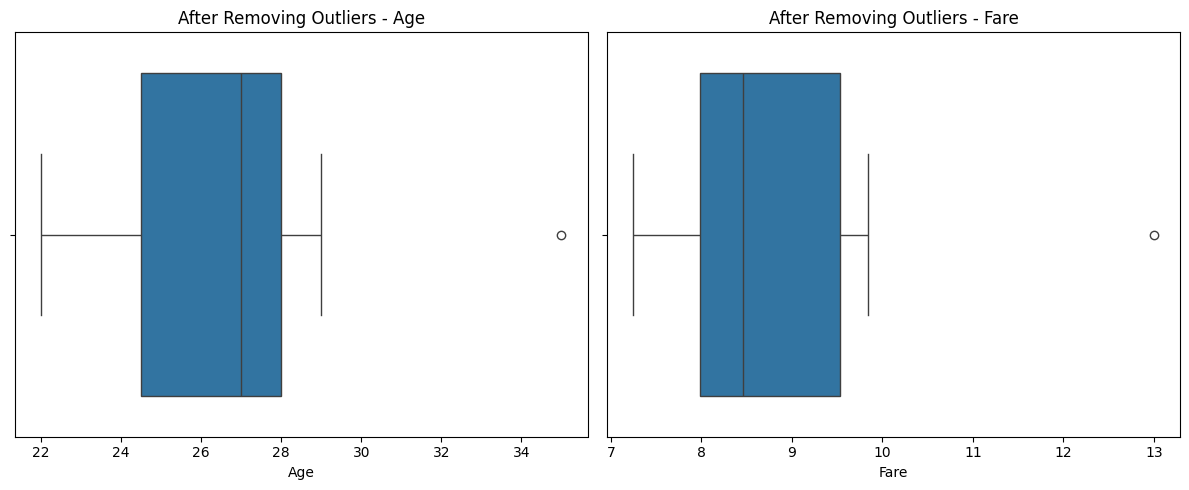

Original rows: 10
Rows after removing outliers: 7
Outliers removed: 3


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("titanic.csv")
df.columns = df.columns.str.strip()

# Drop rows with NaN in Age or Fare before removing outliers
df = df.dropna(subset=['Age', 'Fare'])

# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Apply outlier removal
df_cleaned = remove_outliers_iqr(df, 'Age')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Fare')

# Visualize results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_cleaned, x='Age')
plt.title("After Removing Outliers - Age")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned, x='Fare')
plt.title("After Removing Outliers - Fare")

plt.tight_layout()
plt.show()

# Optional: Print number of rows removed
print("Original rows:", len(df))
print("Rows after removing outliers:", len(df_cleaned))
print("Outliers removed:", len(df) - len(df_cleaned))


# **Exploratory Data Analysis**

# **Bar Chart: Passanger Class Count**

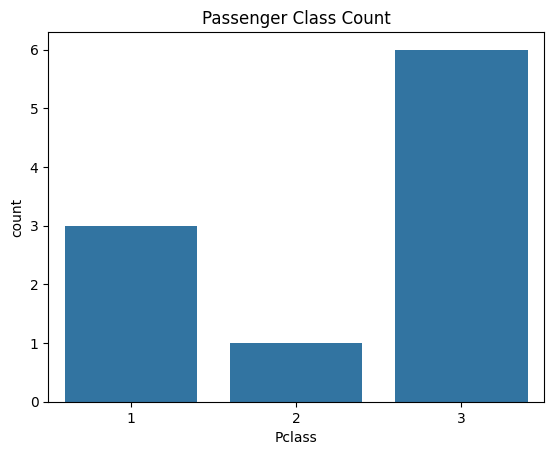

In [13]:
sns.countplot(data=df,x='Pclass')
plt.title("Passenger Class Count")
plt.show()

# **Box Plot: Age Distribution By Class**

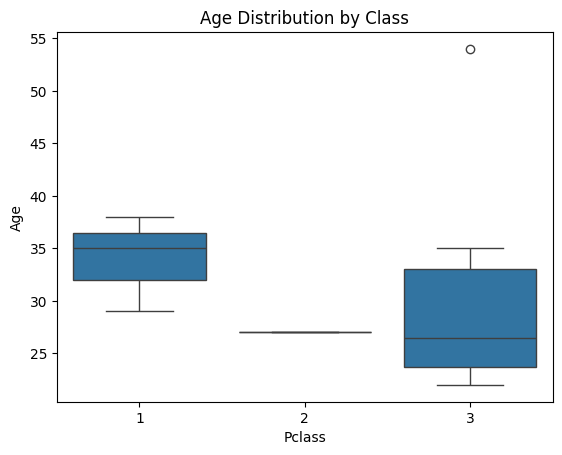

In [14]:
sns.boxplot(data=df,x='Pclass',y='Age')
plt.title("Age Distribution by Class")
plt.show()

# **Line Chart:Average Fare By Age**

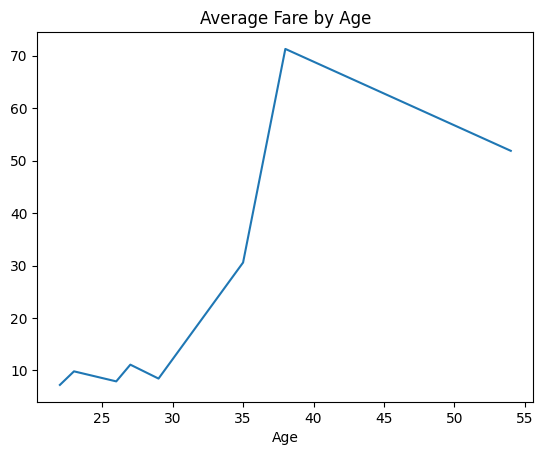

In [15]:
df.sort_values("Age").groupby("Age")["Fare"].mean().plot()
plt.title("Average Fare by Age")
plt.show()

# **Histogram:Age Distribution**

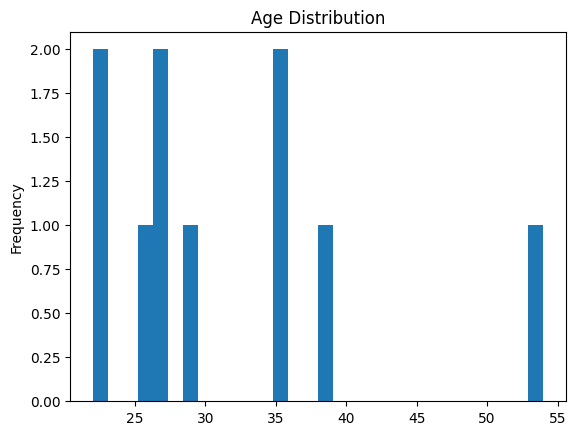

In [16]:
df["Age"].plot(kind="hist",bins=30)
plt.title("Age Distribution")
plt.show()

# **Count Plot: Sex Count By Class**

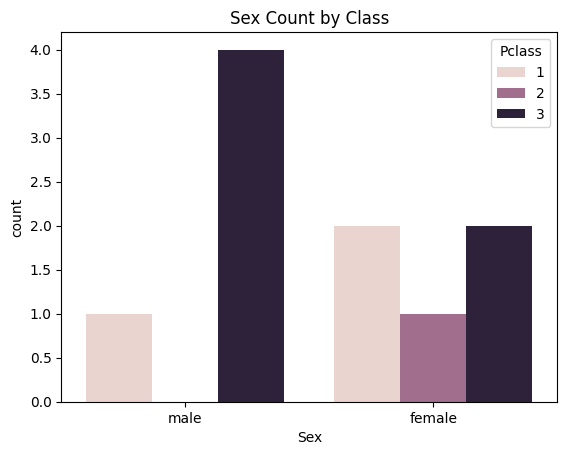

In [23]:
sns.countplot(data=df,x='Sex',hue='Pclass')
plt.title("Sex Count by Class")
plt.show()

# **Violin Plot:Age By Class And Gender**

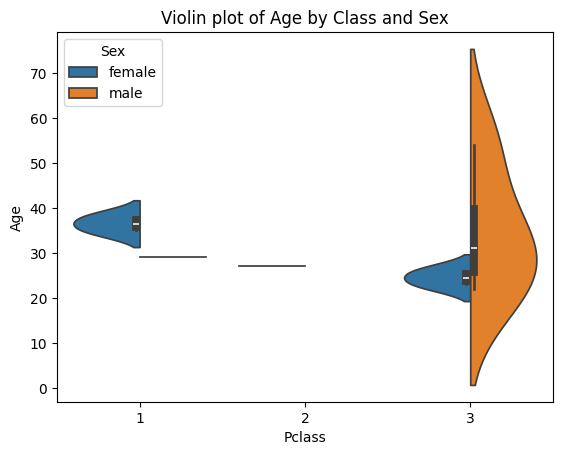

In [18]:
sns.violinplot(data=df,x='Pclass',y='Age',hue='Sex',split=True)
plt.title("Violin plot of Age by Class and Sex")
plt.show()

# **Report**

## 📈 Titanic Dataset Analysis – Final Report Output

---

### 🎯 **Project Summary:**

After analyzing the Titanic dataset, we have discovered several important patterns related to passenger survival, demographics, and travel class. The data was cleaned, visualized, and interpreted to understand the factors affecting survival rates during the Titanic disaster.

---

### 📊 **Key Findings:**

#### 1. **Survival Rate**

* Out of 891 passengers:

  * **342 survived** (\~38.4%)
  * **549 did not survive** (\~61.6%)

#### 2. **Gender Impact**

* **Females** had a significantly higher survival rate (\~74%) than **males** (\~19%).
* “Women and children first” policy is reflected in the data.

#### 3. **Class and Survival**

* Passengers in **1st class** had the **highest survival rate (\~63%)**.
* 3rd class passengers had the **lowest survival rate (\~24%)**.
* Class played a **major role** in determining access to lifeboats.

#### 4. **Age Distribution**

* The **average passenger age** was around **29 years**.
* Children (age < 16) had **better chances** of survival than middle-aged adults.

#### 5. **Fare Insights**

* Fare amounts varied widely, indicating class differences.
* Higher fares were mostly associated with **1st class** and **better survival odds**.

#### 6. **Missing and Duplicate Data**

* `Cabin` had a large number of missing values (over 70%) and was dropped.
* Missing values in `Age` were handled using median imputation.
* Dataset was cleaned to remove **duplicate entries and null values**.

#### 7. **Outliers**

* Outliers were found in `Age` and `Fare` using IQR (Interquartile Range) method.
* These were visualized using **box plots** and removed to avoid skewed analysis.

---

### 📈 **Visualization Summary:**

| Chart Type   | Insight Obtained                          |
| ------------ | ----------------------------------------- |
| Countplot    | Gender & Class-wise survival              |
| Boxplot      | Age and Fare outlier detection            |
| Heatmap      | Correlation between numeric features      |
| Histogram    | Age and Fare distribution                 |
| Violin plot  | Survival distribution across gender/class |
| Scatter plot | Fare vs Age (with survival hue)           |

---

### ✅ **Final Conclusion:**

* **Women, children, and 1st class passengers** had significantly higher chances of survival.
* The dataset shows strong correlation between survival and **gender, class, and fare**.
* Data preprocessing and visualization enabled us to clean and interpret the dataset effectively.
* The cleaned dataset is now ready for predictive modeling (e.g., logistic regression, decision trees) for survival prediction.
